### About:
5/11/2021 Program calculate the correlation coefficient between state and age population in 2011

    (1) between internet speeds
    (2) between states
    (3) between states & internet speeds??? -> Self Assigned

#### NOTE: Make sure to unzip the xlsx files

@author: Minh Nguyen @AIA

@credit: Qasim, Andrei @AIA

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

### Correlation Calculation

In [2]:
def correlation_cal(df):
    # Instead of just dropping the missing values, we will fill in N/A values
    if df.isna().values.any():
        while True:
            missing_type = input("Please enter the type of missing value replacement: mean, medium, mode, or drop from the row")
            missing_type = missing_type.lower()
            if(missing_type in ['mean', 'median', 'mode', 'drop']):
                if(missing_type == 'mean'):
                    df.fillna(df.mean(), inplace=True)
                elif(missing_type == 'median'):
                    df.fillna(df.median(), inplace=True)
                elif(missing_type == 'mode'):
                    df.fillna(df.mode(), inplace=True)
                else:
                    df.dropna()
                break
            else:
                print("Please input the option from the list")
    
    # Calculate input data correlation
    while True:
        corr_type = input("Please enter type of correlation: Pearson, Spearman, or Kendall: ")
        corr_type = corr_type.lower()
        if corr_type in ['pearson', 'spearman', 'kendall']:
            break
        else:
            print("Please try again")
    
    # Plot correlation matrix
    corrMatrix = df.corr(method=corr_type)
    _, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corrMatrix, ax = ax, cmap="YlGnBu", linewidths = 0.1) # cmap can also be "YlGnBu"

# (1) Correlation Calculation Between Population Range

#### Preprocess Data

In [3]:
!ls

Correlation-2008.ipynb
Correlation-2009.ipynb
Correlation-2010.ipynb
Correlation-2011.ipynb
Original Dataset
preprocessed_data.xlsx
sheet.xlsx


In [4]:
def parse_data_bis(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by internet speed for all 50 states + nation (row 0)
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows = [51,52,53,54,55,56,57,58,59,60,61,62], usecols=[1,2,3,4,5,6,7])
    return dataset

In [5]:
df_bis = parse_data_bis("sheet.xlsx", "2011") # Due to long name access, I made a copy of preprocessed_data.xlsx and change to sheet

In [6]:
df_bis.head()

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
0,1175500,441100,522000,1280100,604300,653000,4676000
1,193400,70700,88000,196500,90500,57800,697100
2,1680900,602800,742400,1636700,752000,909700,6324500
3,731400,253600,333800,757200,361300,412400,2849500
4,9641000,3760400,4685900,10286800,4187000,4301600,36862800


### Run 1: Correlation Pearson - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


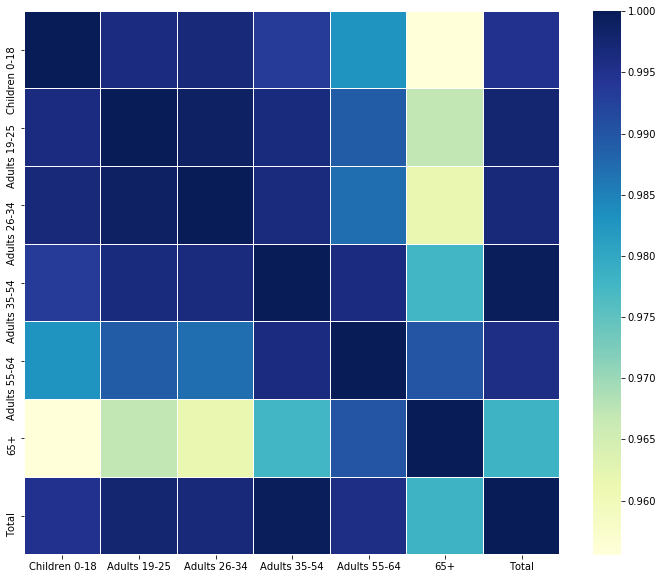

In [7]:
# Run Correlation Pearson
correlation_cal(df_bis)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


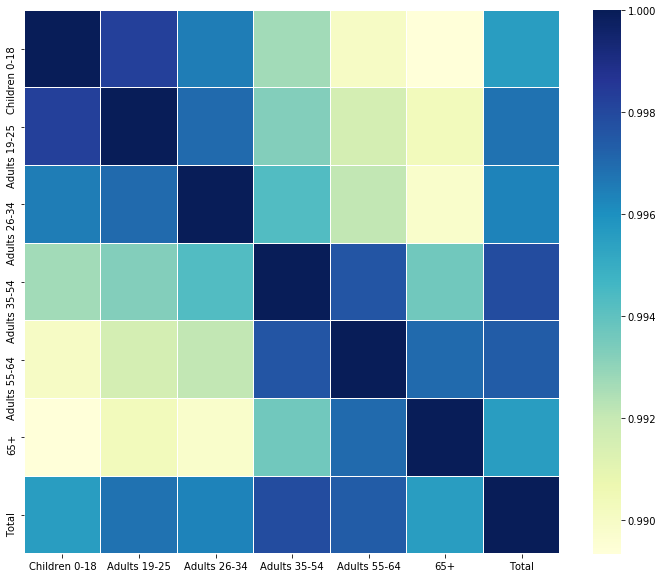

In [8]:
# Run Correlation Spearman
correlation_cal(df_bis)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


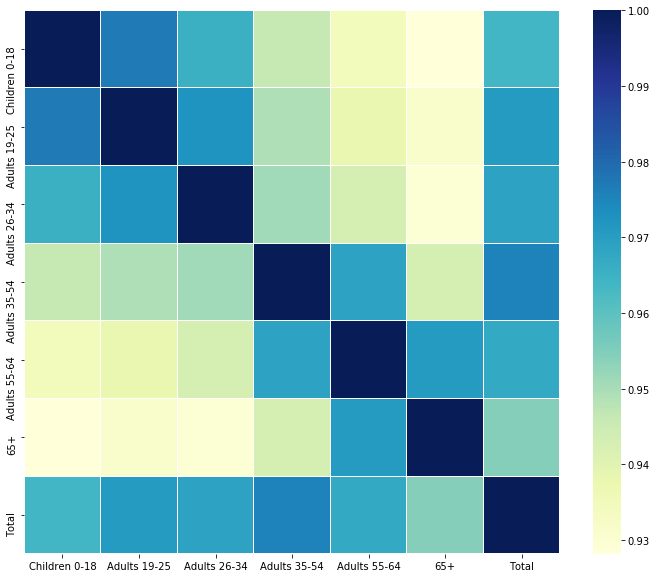

In [9]:
# Run Correlation Kendall
correlation_cal(df_bis)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?

# (2) Correlation Calculation Between States

In [10]:
def parse_data_bs(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by states and nation for all 10 types of internet speeds
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows=[0,51,52,53,54,55,56,57,58,59,60,61,62], usecols=[0,1,2,3,4,5,6,7], drop=True)
    dataset.set_index("Alabama", inplace=True)
    dataset = dataset.T
    
    return dataset

In [11]:
df_bs = parse_data_bs("sheet.xlsx", "2010")

In [12]:
df_bs.head()

Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1182300,196800,1691700,736800,9676100,1272700,845000,213400,4177300,2581900,312500,...,210300,1550000,7152100,905700,131800,1920300,1641800,400600,1375900,141900
436900,64000,582700,258500,3693400,459100,283000,80300,1639200,880400,114800,...,71100,543900,2424400,300900,47700,689600,599200,151900,501200,51400
523500,85700,745100,315400,4633500,628900,361400,97400,1947000,1133400,142500,...,88500,716400,3101500,395500,62800,914000,809300,190500,621300,66400
1282300,200000,1634700,766200,10298400,1419200,1048200,244800,5089300,2742600,362300,...,209800,1757800,6775200,636400,178900,2268000,1873700,501400,1584300,148900
587100,85500,727300,351300,4035800,600200,441700,111100,2334200,1073300,175500,...,95600,783200,2593400,239500,90200,957500,838600,264000,702200,71900


### Run 1: Correlation Pearson - Mean


Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


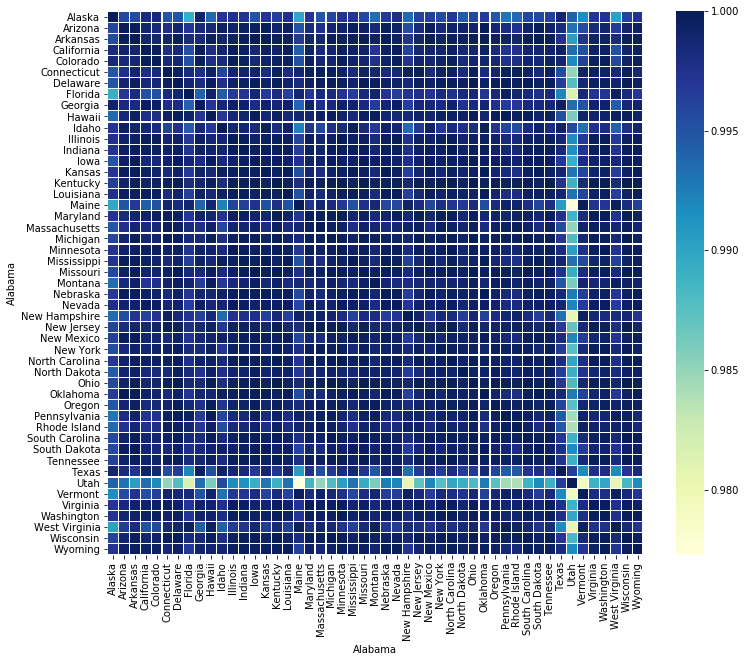

In [13]:
# Run Correlation Pearson
correlation_cal(df_bs)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


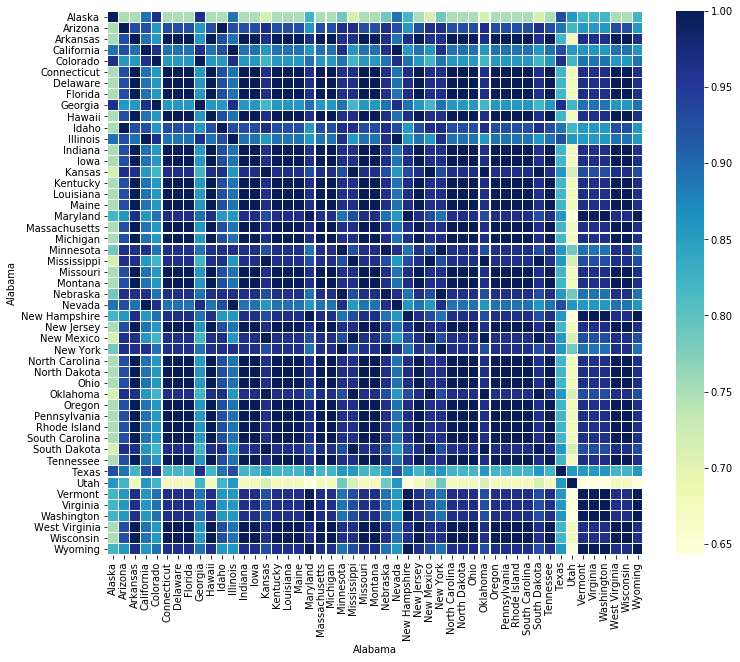

In [14]:
# Run Correlation Spearman
correlation_cal(df_bs)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


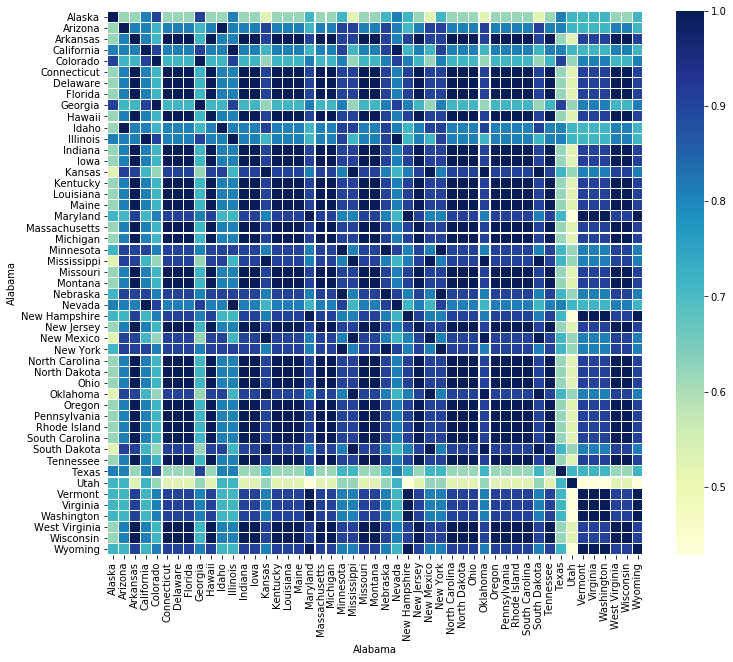

In [15]:
# Run Correlation Kendall
correlation_cal(df_bs)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?